<a href="https://colab.research.google.com/github/szh141/colab/blob/main/PCA_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://builtin.com/machine-learning/pca-in-python

https://medium.com/@hazallgultekin/part1-breast-cancer-classification-ffa904b76afe

Part I. Data visualization, dimension reduction

In [20]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
print(df.head())
print('\n')

pd.unique(df['target'])

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa




array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, features].values   #collect all features/columns of DataFrame into one numpy array

y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)  #standardize numbers makes the learning more efficient and less biased towards large number

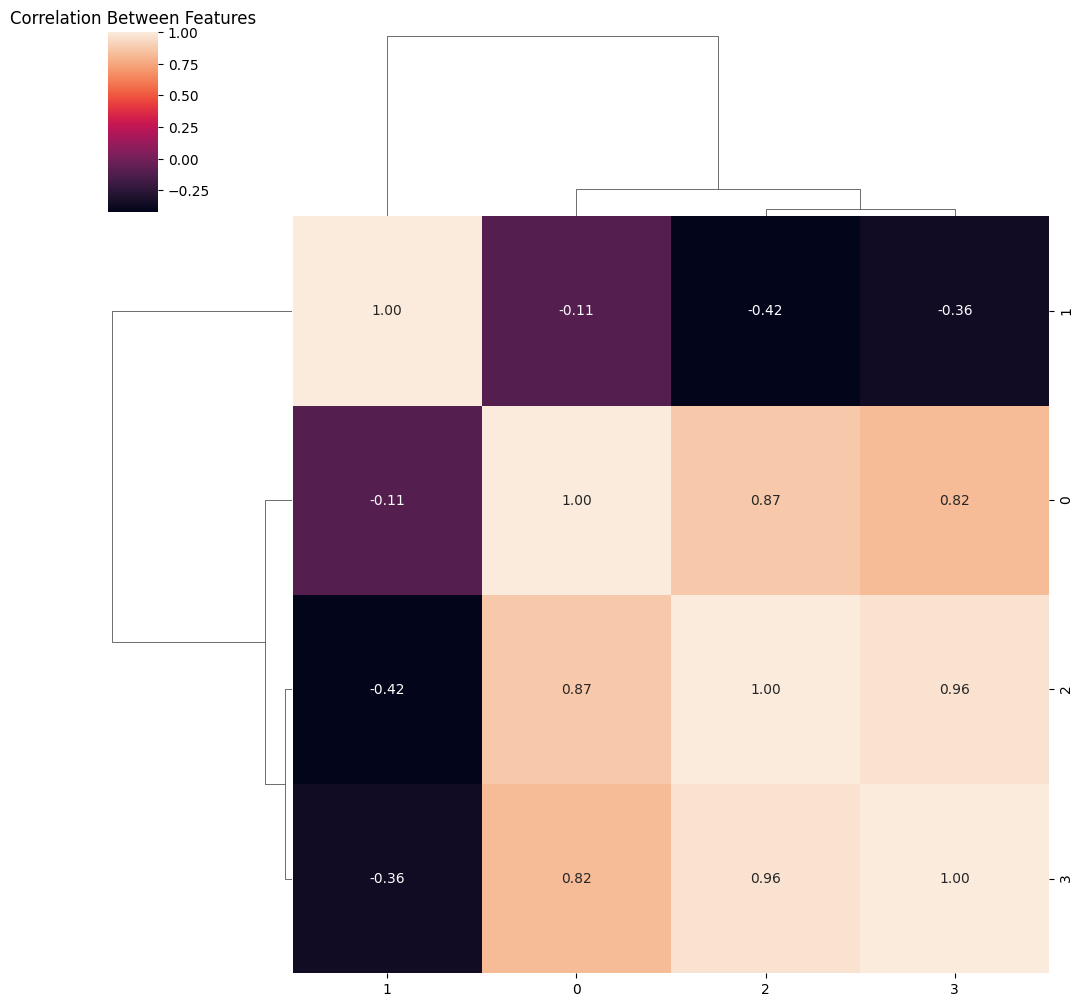

In [5]:
import seaborn as sns #for visualization
from matplotlib import pyplot as plt
test = pd.DataFrame(x)
corr_matrix = test.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()


Thresholded correlation between features and target

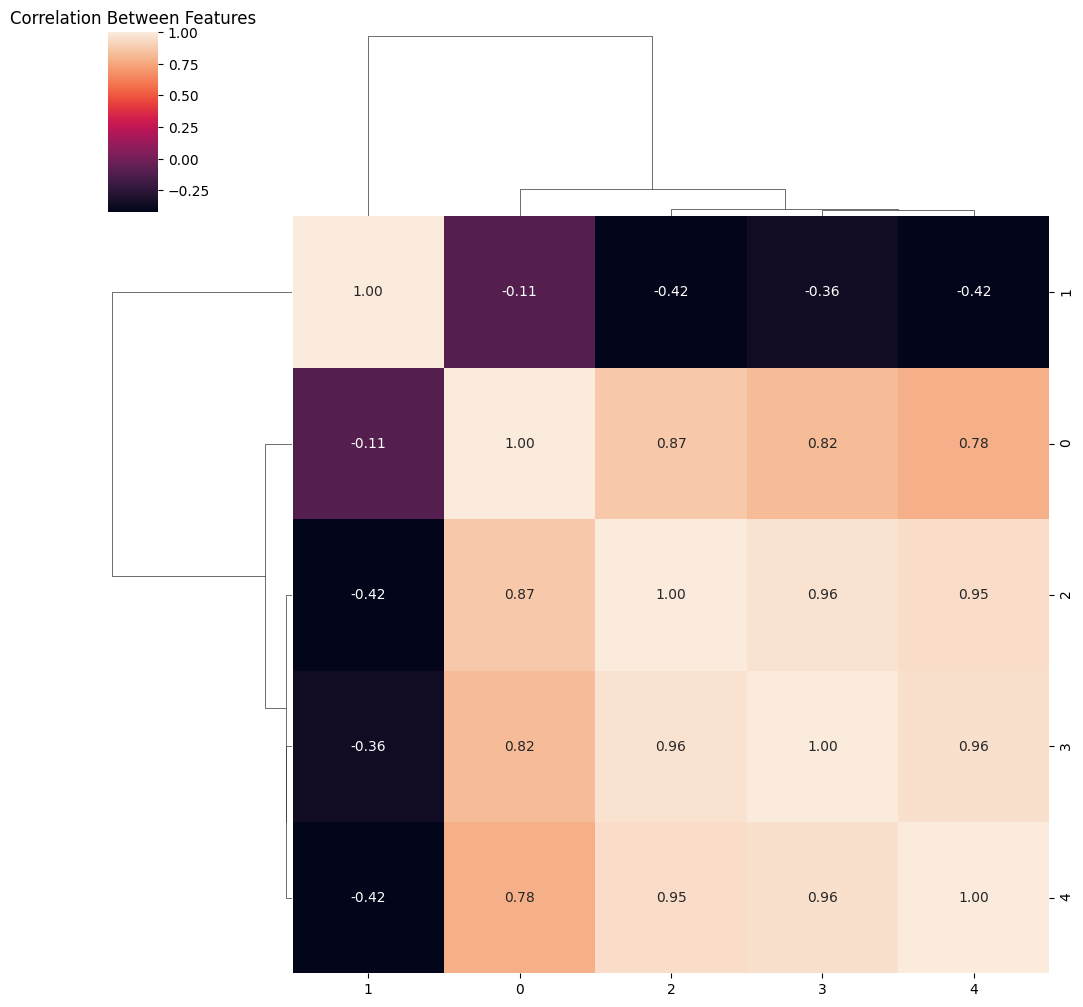

Text(0.5, 1.0, 'Correlation Between Features w Corr Threshold 0.75')

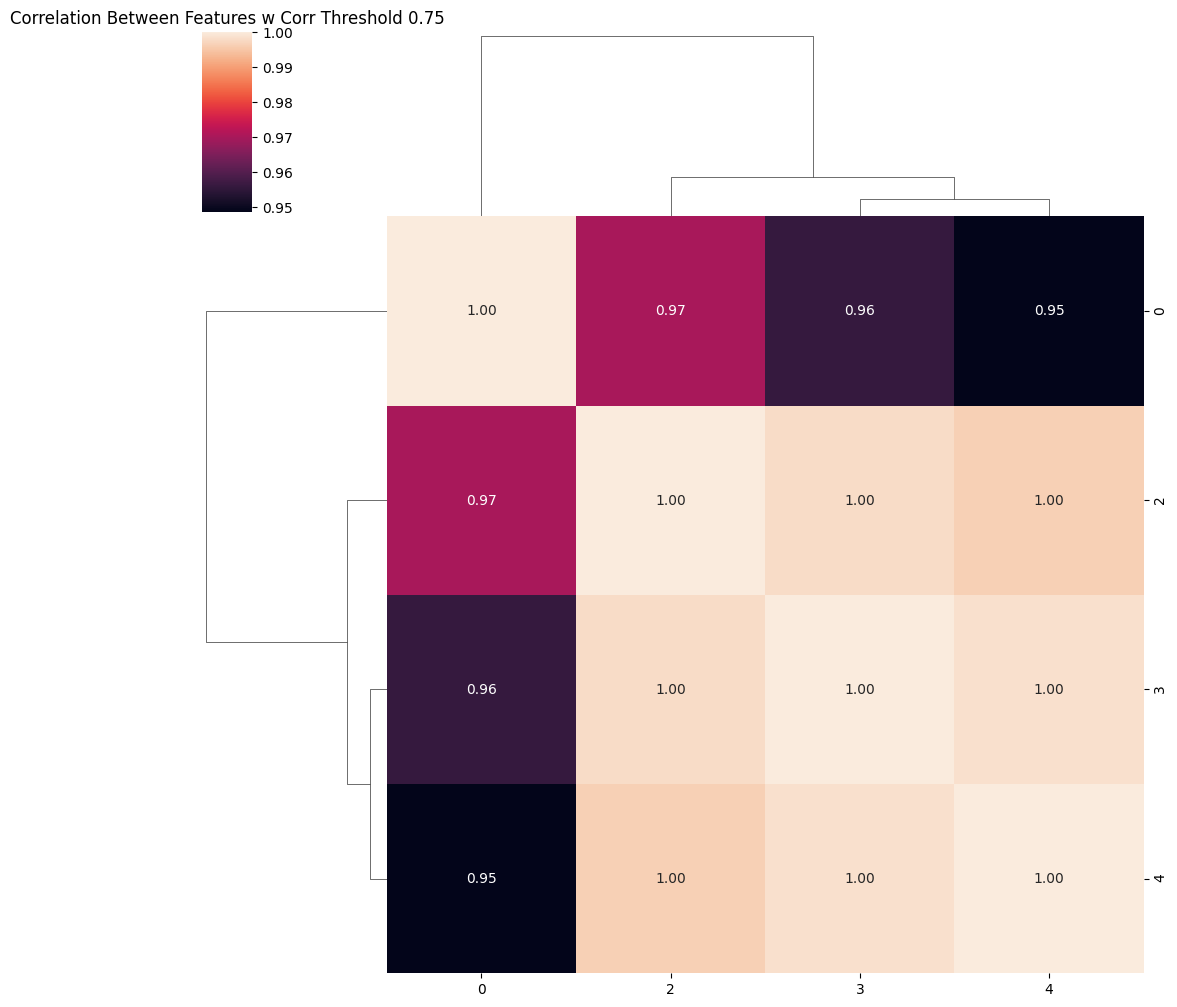

In [29]:
#from sklearn.preprocessing import StandardScaler
#features = ['sepal length', 'sepal width', 'petal length', 'petal width']

#needs to convert target string to value for correlation analysis
df1 = df.replace('Iris-setosa',1)
df2 = df1.replace('Iris-versicolor',2)
df3 = df2.replace('Iris-virginica',3)
pd.unique(df3['target'])

target_and_features = df3.values   #collect all features/columns plus target of DataFrame into one numpy array

x_2 = StandardScaler().fit_transform(target_and_features)  #standardize numbers makes the learning more efficient and less biased towards large number


#import seaborn as sns #for visualization
#from matplotlib import pyplot as plt
import numpy as np
test = pd.DataFrame(x_2)
corr_matrix = test.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

threshold = 0.75
filtre = np.abs(corr_matrix[4]) > threshold

corr_features = corr_matrix.columns[filtre].tolist()

sns.clustermap(corr_matrix[corr_features].corr(), annot = True, fmt = ".2f")

plt.title("Correlation Between Features w Corr Threshold 0.75")

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df['target']], axis = 1)

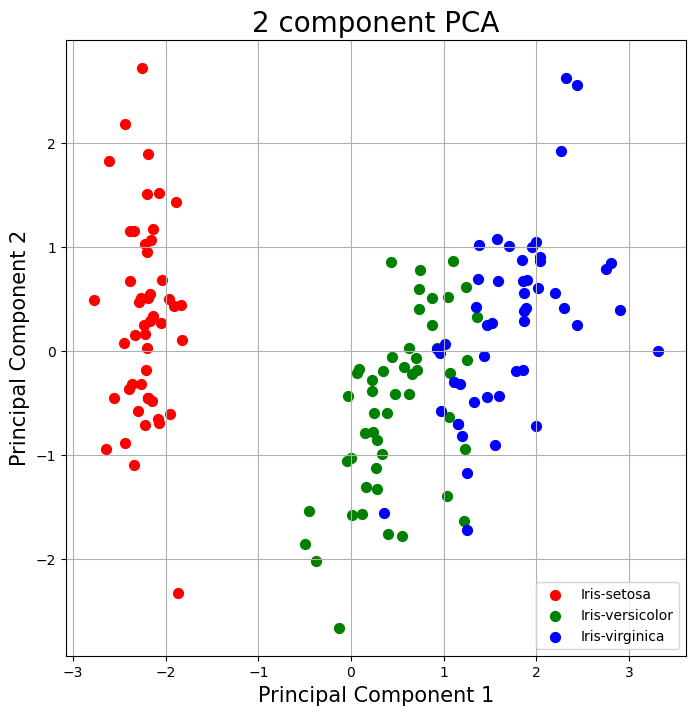

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

plt.legend(targets)
plt.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])